In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [220]:
# READ DATA 
df= pd.read_csv("D:\BIA\Capstone prj\data_sydney.csv")
df

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,amenities,minimum_nights,maximum_nights,has_availability,number_of_reviews,last_review,review_scores_rating,review_scores_location,instant_bookable,price
0,11156,40855,23-09-2009,NaN,NaN,f,1.0,f,-33.867670,151.224970,...,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,180,t,196,13-03-2020,4.60,4.82,f,65
1,14250,55948,20-11-2009,100%,69%,t,2.0,t,-33.800840,151.263780,...,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Hair...",2,22,t,3,01-06-2021,4.67,4.67,f,470
2,15253,59850,03-12-2009,100%,100%,f,3.0,t,-33.879640,151.216800,...,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,t,383,03-12-2021,4.42,4.70,t,82
3,44545,112237,22-04-2010,NaN,NaN,t,1.0,t,-33.878880,151.214390,...,"[""Hot water"", ""Coffee maker"", ""Long term stays...",90,365,t,76,03-01-2020,4.87,4.93,f,130
4,58506,279955,06-11-2010,100%,81%,t,1.0,t,-33.817480,151.234840,...,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,t,297,30-11-2021,4.55,4.73,f,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20875,53694459,177764872,11-03-2018,100%,100%,f,17.0,t,-33.930222,151.190360,...,"[""TV"", ""Hot water"", ""Long term stays allowed"",...",1,365,t,0,NaN,NaN,NaN,t,79
20876,53694614,177764872,11-03-2018,100%,100%,f,17.0,t,-33.929359,151.187843,...,"[""TV"", ""Hot water"", ""Long term stays allowed"",...",1,1125,t,0,NaN,NaN,NaN,t,80
20877,53709256,405908277,08-06-2021,91%,91%,f,36.0,t,-33.781406,151.111693,...,"[""Hot water"", ""Long term stays allowed"", ""Heat...",2,1125,t,0,NaN,NaN,NaN,f,150
20878,53709785,102664004,06-11-2016,100%,98%,f,26.0,t,-33.921565,151.191030,...,"[""Elevator"", ""TV"", ""Washer"", ""Long term stays ...",2,1125,t,0,NaN,NaN,NaN,f,169


In [221]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'last_review', 'review_scores_rating',
       'review_scores_location', 'instant_bookable', 'price'],
      dtype='object')

In [222]:
# Data Exploration
df.head()

,id,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,amenities,minimum_nights,maximum_nights,has_availability,number_of_reviews,last_review,review_scores_rating,review_scores_location,instant_bookable,price
0,11156,40855,23-09-2009,NaN,NaN,f,1.0,f,-33.86767,151.22497,...,"[""Hot water"", ""Long term stays allowed"", ""Heat...",90,180,t,196,13-03-2020,4.60,4.82,f,65
1,14250,55948,20-11-2009,100%,69%,t,2.0,t,-33.80084,151.26378,...,"[""Hot water"", ""Coffee maker"", ""Heating"", ""Hair...",2,22,t,3,01-06-2021,4.67,4.67,f,470
2,15253,59850,03-12-2009,100%,100%,f,3.0,t,-33.87964,151.21680,...,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,t,383,03-12-2021,4.42,4.70,t,82
3,44545,112237,22-04-2010,NaN,NaN,t,1.0,t,-33.87888,151.21439,...,"[""Hot water"", ""Coffee maker"", ""Long term stays...",90,365,t,76,03-01-2020,4.87,4.93,f,130
4,58506,279955,06-11-2010,100%,81%,t,1.0,t,-33.81748,151.23484,...,"[""Hot water"", ""Coffee maker"", ""Long term stays...",2,90,t,297,30-11-2021,4.55,4.73,f,150


In [223]:
df.describe()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_location,price
count,2.088000e+04,2.088000e+04,20877.000000,20880.000000,20880.000000,20880.000000,19444.000000,19976.000000,20880.000000,20880.000000,20880.000000,15071.000000,14453.000000,20880.000000
mean,2.720240e+07,1.019938e+08,10.949370,-33.859605,151.197986,3.383333,1.704330,2.039848,62.189464,905.051006,17.895738,4.471015,4.816509,251.166188
std,1.474586e+07,1.063508e+08,40.993293,0.079545,0.093395,2.188119,1.036077,1.538269,52.739348,407.076078,42.994370,1.050036,0.384305,498.598911
min,1.115600e+04,2.174100e+04,0.000000,-34.100680,150.630490,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,13.000000
25%,1.490512e+07,1.942855e+07,1.000000,-33.898902,151.172618,2.000000,1.000000,1.000000,4.000000,1125.000000,0.000000,4.500000,4.800000,80.000000
50%,2.688311e+07,5.282358e+07,1.000000,-33.881245,151.214080,2.000000,1.000000,1.000000,90.000000,1125.000000,2.000000,4.810000,4.960000,140.000000
75%,4.023812e+07,1.603918e+08,3.000000,-33.824190,151.260882,4.000000,2.000000,3.000000,90.000000,1125.000000,13.000000,5.000000,5.000000,250.000000
max,5.371000e+07,4.339022e+08,457.000000,-33.392670,151.340410,16.000000,18.000000,39.000000,1125.000000,1500.000000,881.000000,5.000000,5.000000,28613.000000


In [224]:
df['id'].count()

20880

In [225]:
df.dtypes

id                          int64
host_id                     int64
host_since                 object
host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
host_listings_count       float64
host_identity_verified     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
minimum_nights              int64
maximum_nights              int64
has_availability           object
number_of_reviews           int64
last_review                object
review_scores_rating      float64
review_scores_location    float64
instant_bookable           object
price                       int64
dtype: object

<AxesSubplot:>

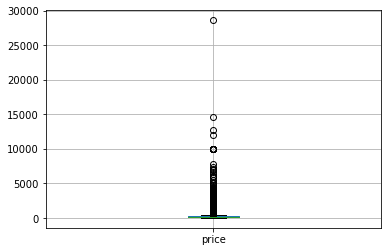

In [226]:
# outliers in price.
df.boxplot(column="price")

In [227]:
df["host_is_superhost"].value_counts()

f    17841
t     3036
Name: host_is_superhost, dtype: int64

In [228]:
df["host_identity_verified"].value_counts()

t    16295
f     4582
Name: host_identity_verified, dtype: int64

In [229]:
df["property_type"].value_counts()

Entire rental unit                  8218
Private room in rental unit         3331
Entire residential home             3106
Private room in residential home    2424
Entire guest suite                   411
                                    ... 
Floor                                  1
Shared room in boat                    1
Train                                  1
Private room in tipi                   1
Private room in barn                   1
Name: property_type, Length: 85, dtype: int64

In [230]:
df["room_type"].value_counts()

Entire home/apt    13398
Private room        7004
Shared room          337
Hotel room           141
Name: room_type, dtype: int64

In [231]:
df["accommodates"].value_counts()

2     8881
4     4082
1     2134
6     1672
3     1346
5      972
8      812
7      396
10     272
9      134
12      68
11      41
16      29
14      26
13      12
15       3
Name: accommodates, dtype: int64

In [232]:
df["bathrooms_text"].value_counts()

1 bath               9724
1 shared bath        2990
2 baths              2961
1 private bath       1577
1.5 baths             889
3 baths               651
2.5 baths             574
1.5 shared baths      379
2 shared baths        375
3.5 baths             171
4 baths               146
2.5 shared baths       67
3 shared baths         67
0 shared baths         58
0 baths                43
5 baths                35
4.5 baths              31
Half-bath              25
Shared half-bath       22
4 shared baths         17
3.5 shared baths       12
5.5 baths              11
6 shared baths          7
4.5 shared baths        5
6 baths                 5
Private half-bath       4
7 shared baths          2
6.5 baths               2
5.5 shared baths        2
5 shared baths          1
7 baths                 1
11 baths                1
19 baths                1
Name: bathrooms_text, dtype: int64

In [233]:
df["bedrooms"].value_counts()

1.0     11307
2.0      4652
3.0      1962
4.0      1082
5.0       365
6.0        64
7.0         8
10.0        2
11.0        1
18.0        1
Name: bedrooms, dtype: int64

In [234]:
df["has_availability"].value_counts()

t    20597
f      283
Name: has_availability, dtype: int64

In [235]:
df["review_scores_rating"].value_counts()

5.00    4691
4.00     877
4.50     650
0.00     594
4.67     495
        ... 
3.74       1
3.73       1
4.02       1
3.65       1
3.93       1
Name: review_scores_rating, Length: 141, dtype: int64

In [236]:
df["instant_bookable"].value_counts()

f    13516
t     7364
Name: instant_bookable, dtype: int64

In [237]:
#Remove prices = 0 replace 0's with NaN, drop all Nans
df['price'] = df['price'].replace(0,np.nan)
df = df.dropna(axis = 0, how = 'any', subset = ['price'])


In [238]:
# consider only prices below 500
df = df[df['price'] <= 500]

In [239]:
df.count()

id                        18925
host_id                   18925
host_since                18922
host_response_rate         6629
host_acceptance_rate       7606
host_is_superhost         18922
host_listings_count       18922
host_identity_verified    18922
latitude                  18925
longitude                 18925
property_type             18925
room_type                 18925
accommodates              18925
bathrooms_text            18904
bedrooms                  17505
beds                      18087
amenities                 18925
minimum_nights            18925
maximum_nights            18925
has_availability          18925
number_of_reviews         18925
last_review               13918
review_scores_rating      13918
review_scores_location    13335
instant_bookable          18925
price                     18925
dtype: int64

In [240]:
df.describe()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_location,price
count,1.892500e+04,1.892500e+04,18922.000000,18925.000000,18925.000000,18925.000000,17505.000000,18087.000000,18925.000000,18925.000000,18925.000000,13918.000000,13335.000000,18925.000000
mean,2.696781e+07,1.037352e+08,10.093542,-33.865728,151.192250,3.003435,1.505056,1.798806,64.178547,919.795720,18.749485,4.453614,4.809267,155.200740
std,1.456806e+07,1.065324e+08,40.258505,0.072027,0.093506,1.747764,0.792078,1.226230,51.701113,395.493204,44.228506,1.061187,0.391389,106.085831
min,1.115600e+04,2.174100e+04,0.000000,-34.100680,150.630490,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,13.000000
25%,1.490246e+07,2.035452e+07,1.000000,-33.900600,151.165010,2.000000,1.000000,1.000000,4.000000,1125.000000,0.000000,4.500000,4.790000,75.000000
50%,2.629356e+07,5.492456e+07,1.000000,-33.882910,151.211260,2.000000,1.000000,1.000000,90.000000,1125.000000,3.000000,4.800000,4.950000,125.000000
75%,4.003592e+07,1.620246e+08,3.000000,-33.832350,151.255340,4.000000,2.000000,2.000000,90.000000,1125.000000,14.000000,5.000000,5.000000,200.000000
max,5.371000e+07,4.339022e+08,457.000000,-33.398740,151.338860,16.000000,10.000000,16.000000,1125.000000,1500.000000,881.000000,5.000000,5.000000,500.000000


In [241]:
# Correlation

df.price
max(df.price)

500

In [242]:
df.count()

id                        18925
host_id                   18925
host_since                18922
host_response_rate         6629
host_acceptance_rate       7606
host_is_superhost         18922
host_listings_count       18922
host_identity_verified    18922
latitude                  18925
longitude                 18925
property_type             18925
room_type                 18925
accommodates              18925
bathrooms_text            18904
bedrooms                  17505
beds                      18087
amenities                 18925
minimum_nights            18925
maximum_nights            18925
has_availability          18925
number_of_reviews         18925
last_review               13918
review_scores_rating      13918
review_scores_location    13335
instant_bookable          18925
price                     18925
dtype: int64

In [243]:
# Column names
cols = df.columns.tolist()
cols

['id',
 'host_id',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'number_of_reviews',
 'last_review',
 'review_scores_rating',
 'review_scores_location',
 'instant_bookable',
 'price']

In [244]:
# Missing values - remove 
df.isna().sum() 

id                            0
host_id                       0
host_since                    3
host_response_rate        12296
host_acceptance_rate      11319
host_is_superhost             3
host_listings_count           3
host_identity_verified        3
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms_text               21
bedrooms                   1420
beds                        838
amenities                     0
minimum_nights                0
maximum_nights                0
has_availability              0
number_of_reviews             0
last_review                5007
review_scores_rating       5007
review_scores_location     5590
instant_bookable              0
price                         0
dtype: int64

In [245]:
df = df.dropna(axis=0, how='any', subset=cols)
print(df.shape)

(4567, 26)


In [246]:
df.count()

id                        4567
host_id                   4567
host_since                4567
host_response_rate        4567
host_acceptance_rate      4567
host_is_superhost         4567
host_listings_count       4567
host_identity_verified    4567
latitude                  4567
longitude                 4567
property_type             4567
room_type                 4567
accommodates              4567
bathrooms_text            4567
bedrooms                  4567
beds                      4567
amenities                 4567
minimum_nights            4567
maximum_nights            4567
has_availability          4567
number_of_reviews         4567
last_review               4567
review_scores_rating      4567
review_scores_location    4567
instant_bookable          4567
price                     4567
dtype: int64

In [247]:
#Drop unwanted columns

df["host_response_rate"].value_counts()

100%    3364
98%      169
99%      156
0%       117
97%       97
90%       87
80%       56
50%       55
96%       44
75%       43
93%       41
88%       29
67%       28
94%       25
91%       24
83%       23
95%       19
33%       18
86%       17
89%       16
60%       14
71%       14
92%       13
70%       12
25%       12
73%       11
61%       10
85%        8
20%        6
69%        6
40%        5
87%        5
78%        4
17%        3
82%        3
63%        3
14%        2
11%        2
77%        1
30%        1
57%        1
38%        1
84%        1
81%        1
Name: host_response_rate, dtype: int64

In [248]:
df = df.drop('id', axis=1)

In [249]:
df = df.drop('host_id', axis=1)

In [250]:
df = df.drop('host_response_rate', axis=1)

In [251]:
df = df.drop('host_acceptance_rate', axis=1)

In [252]:
df = df.drop('last_review', axis=1)

In [253]:
df = df.drop('review_scores_location', axis=1)

In [254]:
df = df.drop('host_since', axis=1)

In [255]:
df = df.drop('bathrooms_text', axis=1)

In [256]:
df = df.drop('amenities', axis=1)

In [257]:
# Count property types.
df_property_type_statistic = df.groupby(
    ['property_type'])['price'].describe().reset_index()
df_property_type_statistic 

,property_type,count,mean,std,min,25%,50%,75%,max
0,Boat,3.0,402.000000,80.727938,325.0,360.00,395.0,440.50,486.0
1,Bus,1.0,125.000000,NaN,125.0,125.00,125.0,125.00,125.0
2,Casa particular,1.0,110.000000,NaN,110.0,110.00,110.0,110.00,110.0
3,Cave,1.0,370.000000,NaN,370.0,370.00,370.0,370.00,370.0
4,Dome house,1.0,300.000000,NaN,300.0,300.00,300.0,300.00,300.0
5,Earth house,1.0,140.000000,NaN,140.0,140.00,140.0,140.00,140.0
6,Entire bungalow,19.0,183.052632,93.228199,75.0,116.50,129.0,267.00,336.0
7,Entire cabin,11.0,201.000000,105.635221,80.0,123.00,176.0,250.00,383.0
8,Entire condominium (condo),80.0,189.987500,89.970247,65.0,128.00,164.5,233.75,450.0
9,Entire cottage,41.0,300.146341,113.984113,84.0,200.00,299.0,398.00,500.0


In [258]:
remove_property_type=[]

In [259]:
# remove property types which are less than 15
for i in range(0,len(df_property_type_statistic)) :
    if df_property_type_statistic["count"][i] < 15:
        remove_property_type.append(
            df_property_type_statistic["property_type"][i])

In [260]:
df_property_type_statistic

,property_type,count,mean,std,min,25%,50%,75%,max
0,Boat,3.0,402.000000,80.727938,325.0,360.00,395.0,440.50,486.0
1,Bus,1.0,125.000000,NaN,125.0,125.00,125.0,125.00,125.0
2,Casa particular,1.0,110.000000,NaN,110.0,110.00,110.0,110.00,110.0
3,Cave,1.0,370.000000,NaN,370.0,370.00,370.0,370.00,370.0
4,Dome house,1.0,300.000000,NaN,300.0,300.00,300.0,300.00,300.0
5,Earth house,1.0,140.000000,NaN,140.0,140.00,140.0,140.00,140.0
6,Entire bungalow,19.0,183.052632,93.228199,75.0,116.50,129.0,267.00,336.0
7,Entire cabin,11.0,201.000000,105.635221,80.0,123.00,176.0,250.00,383.0
8,Entire condominium (condo),80.0,189.987500,89.970247,65.0,128.00,164.5,233.75,450.0
9,Entire cottage,41.0,300.146341,113.984113,84.0,200.00,299.0,398.00,500.0


In [290]:
    
df = df[~df['property_type'].isin(remove_property_type)]

In [262]:
# Re-Count property types.
df_property_type_statistic = df.groupby(
    ['property_type'])['price'].describe().reset_index()
df_property_type_statistic

,property_type,count,mean,std,min,25%,50%,75%,max
0,Entire bungalow,19.0,183.052632,93.228199,75.0,116.50,129.0,267.00,336.0
1,Entire condominium (condo),80.0,189.987500,89.970247,65.0,128.00,164.5,233.75,450.0
2,Entire cottage,41.0,300.146341,113.984113,84.0,200.00,299.0,398.00,500.0
3,Entire guest suite,199.0,144.231156,72.000749,50.0,98.00,127.0,170.50,500.0
4,Entire guesthouse,173.0,135.994220,60.828246,47.0,94.00,115.0,166.00,468.0
5,Entire loft,32.0,184.281250,90.787677,76.0,116.50,148.5,226.75,428.0
6,Entire rental unit,2077.0,214.801637,95.997442,44.0,146.00,191.0,261.00,500.0
7,Entire residential home,536.0,277.328358,121.248938,50.0,179.00,271.0,375.00,500.0
8,Entire serviced apartment,65.0,269.769231,103.157611,70.0,199.00,259.0,343.00,495.0
9,Entire townhouse,122.0,271.827869,109.797537,90.0,181.50,251.5,348.75,500.0


In [263]:
# Count room types.
df_room_type_statistic = df.groupby(
    ['room_type'])['price'].describe().reset_index()
df_room_type_statistic

,room_type,count,mean,std,min,25%,50%,75%,max
0,Entire home/apt,3344.0,219.676435,105.830507,44.0,140.0,193.0,280.0,500.0
1,Hotel room,52.0,206.230769,75.425230,105.0,148.0,185.0,259.0,419.0
2,Private room,1014.0,83.337278,56.095591,20.0,49.0,68.0,95.0,500.0


In [264]:
# Correlation
cor = df.corr()

<AxesSubplot:>

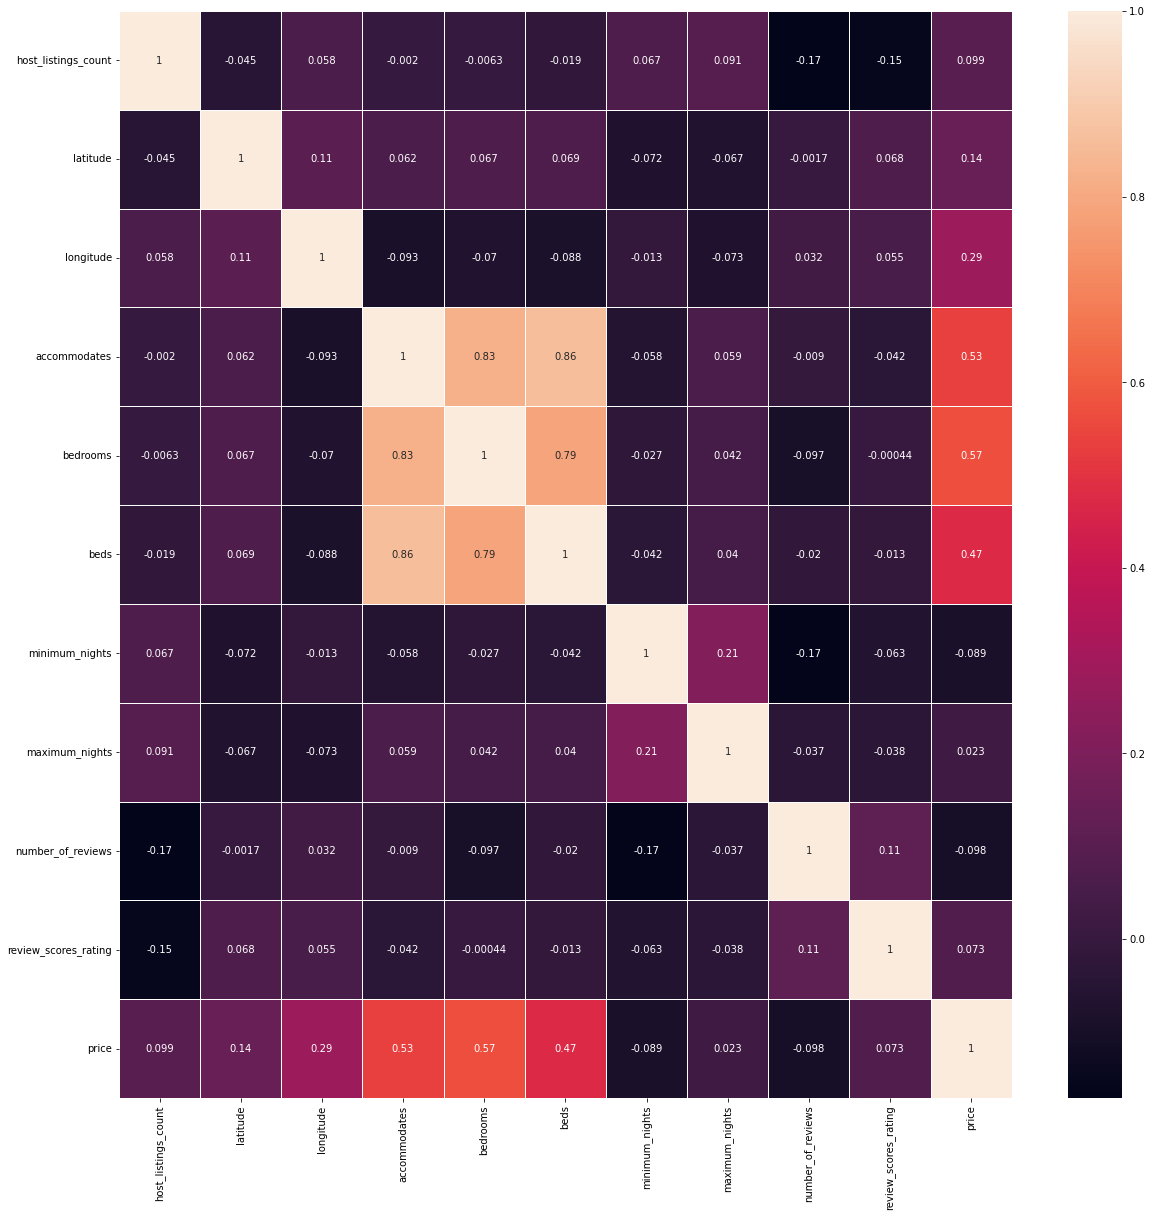

In [265]:
#Visualisation
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='accommodates', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='beds', ylabel='price'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='accommodates'>,
        <AxesSubplot:xlabel='accommodates', ylabel='accommodates'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='accommodates'>,
        <AxesSubplot:xlabel='beds', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='accommodates'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='accommodates', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='beds', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='bedrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='beds'>,
        <Axe

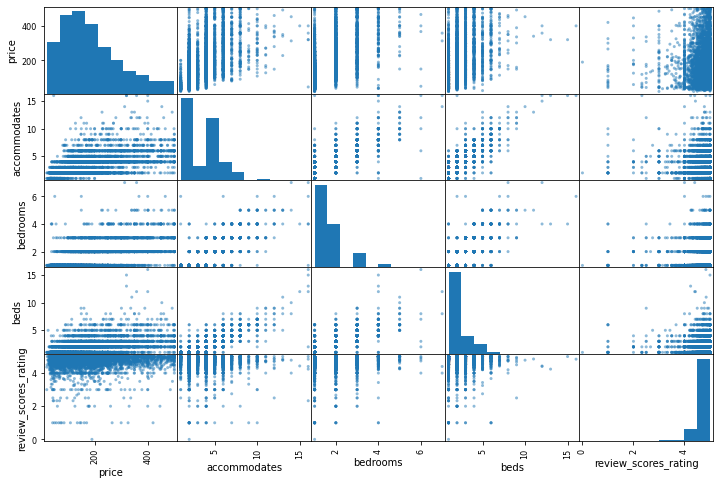

In [266]:
cor["price"].sort_values(ascending = False)
attributes = ["price", "accommodates", "bedrooms", 
              "beds","review_scores_rating"]
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='accommodates', ylabel='price'>

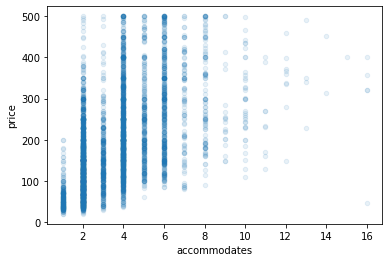

In [267]:
#Scatter plot showing price against accomodation
df.plot(kind="scatter", x="accommodates", y="price", alpha=0.1)

[Text(0.5, 1.0, 'Listing Price Distribution')]

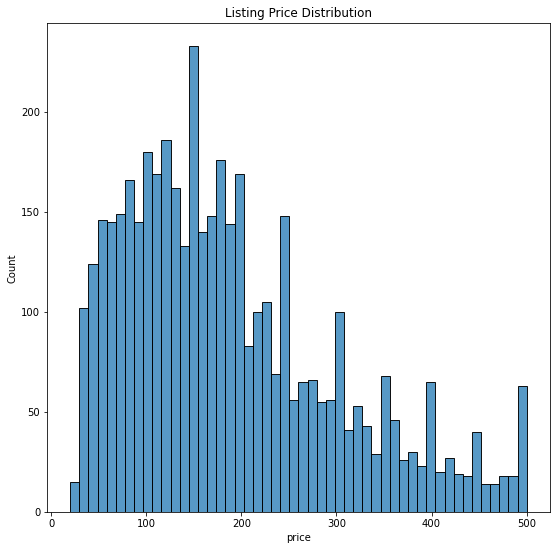

In [268]:
# Histogram - Prices 
fig, ax = plt.subplots(figsize=(9, 9))
sns.histplot(data=df, x="price",bins=50).set(
    title="Listing Price Distribution")

[Text(0.5, 1.0, 'Property_Type Price Distribution')]

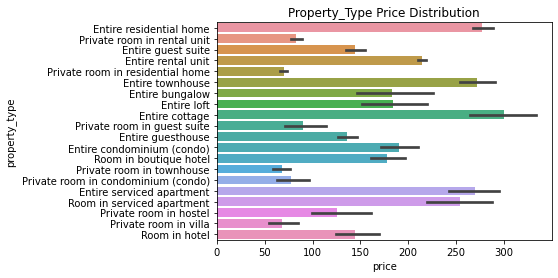

In [269]:
# Barplot for property type distribution

sns.barplot(x="price", y="property_type", data=df).set(
    title="Property_Type Price Distribution")

<AxesSubplot:xlabel='count', ylabel='property_type'>

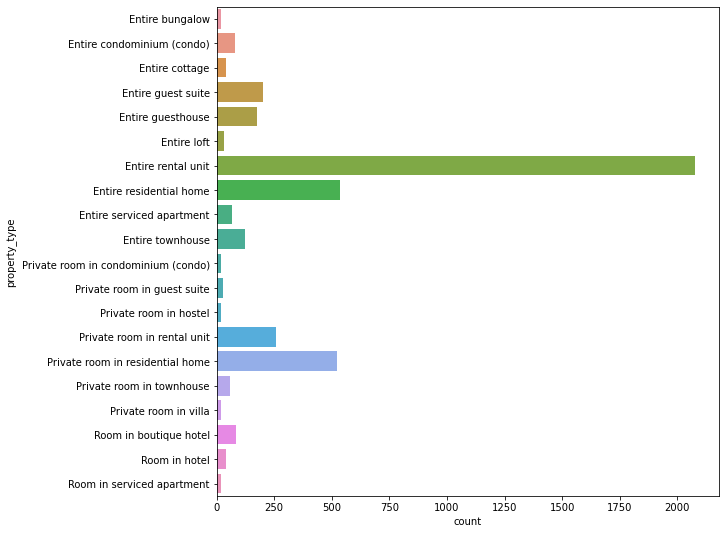

In [270]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(x="count", y="property_type", data=df_property_type_statistic)


[Text(0.5, 1.0, 'Room Type Distribution')]

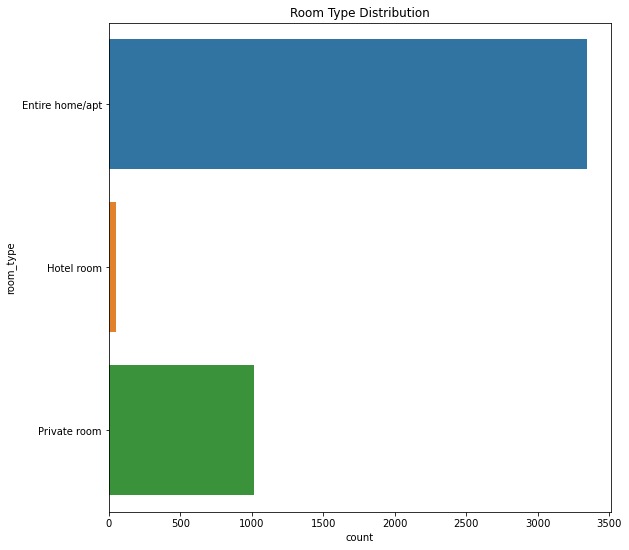

In [271]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.barplot(x="count", y="room_type", data=df_room_type_statistic).set(
    title="Room Type Distribution")

In [272]:
#Encoding
#Create X and y arrays 
X = df.iloc[:, :-1].values #whole except price column


In [273]:
y = df.iloc[:, -1].values #only price column

In [274]:
# fuction to transfrom categorical columns.

def encode_label(arr_x, df_x):
    '''
    INPUT
    arr_x - X array
    df_x - dataframe
    
    OUTPUT
    arrays with numerical values
    '''
    le = LabelEncoder()
    index = 0
    for col in df_x.columns:
        if df_x[col].dtype == "object":
            arr_x[:,index] = le.fit_transform(arr_x[:,index])
            index = index + 1 
        else:
            index = index + 1      
    return arr_x


In [275]:
# label encoding-X
X = encode_label(X, df)
X

array([[1, 2.0, 1, ..., 3, 4.67, 0],
       [0, 3.0, 1, ..., 383, 4.42, 1],
       [1, 1.0, 1, ..., 297, 4.55, 0],
       ...,
       [0, 0.0, 0, ..., 1, 5.0, 0],
       [0, 0.0, 1, ..., 1, 5.0, 0],
       [0, 1.0, 1, ..., 1, 5.0, 0]], dtype=object)

In [276]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) 
y

array([427,  59, 127, ...,  66, 326, 257], dtype=int64)

In [277]:
# Split data
X_train, X_test, y_train, y_test =  train_test_split(
    X,y,test_size = 0.2, random_state= 0)
X_train, X_test, y_train, y_test

(array([[1, 1.0, 1, ..., 81, 4.79, 1],
        [0, 3.0, 1, ..., 5, 5.0, 0],
        [1, 9.0, 1, ..., 25, 4.92, 0],
        ...,
        [1, 14.0, 1, ..., 36, 4.67, 0],
        [0, 5.0, 1, ..., 21, 4.1, 1],
        [0, 7.0, 1, ..., 12, 4.58, 1]], dtype=object),
 array([[0, 3.0, 1, ..., 13, 4.92, 0],
        [0, 1.0, 0, ..., 5, 3.8, 1],
        [0, 1.0, 1, ..., 29, 4.93, 0],
        ...,
        [0, 7.0, 1, ..., 11, 4.27, 1],
        [0, 163.0, 1, ..., 2, 4.5, 1],
        [0, 0.0, 1, ..., 1, 5.0, 0]], dtype=object),
 array([277, 127, 174, ..., 106,  92, 157], dtype=int64),
 array([ 86,  47, 274, 326, 277,  77, 136, 162,  27,  32, 301, 348,  98,
        217, 211, 176,  57,  97, 166, 127, 222, 257, 177, 224,  47,  27,
        210, 227,  82,  83,  11,  31,  83,  90, 116,  73,  56,  86, 321,
        106,  67,  42, 326,  57, 253, 145, 113, 103, 412, 450, 365, 266,
        143, 450, 172,  56, 309,  86,  86,  62, 157,  17, 127, 237, 369,
        450, 321, 127,  14, 177,  87, 112, 371, 127,  62,

In [278]:
# Model 

# Training the Multiple Linear Regression model on the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)
#regressor.coef_

LinearRegression()

In [279]:
# test the prediction on test data
y_pred = regressor.predict(X_test)

In [280]:
# check the type of pred and test
y_test.dtype

dtype('int64')

In [281]:
y_pred.dtype

dtype('float64')

In [282]:
# convert pred to int
#y_test = y_test.astype(np.float64)
y_pred = y_pred.astype(np.float64)

In [283]:
print(np.concatenate((y_pred.reshape(
    len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[119.43157157  86.        ]
 [-24.9719883   47.        ]
 [151.81433024 274.        ]
 ...
 [145.07856242 275.        ]
 [325.42997071 440.        ]
 [122.440634    86.        ]]


In [284]:
#Metrics 

r2 = r2_score(y_test, y_pred)
print("R_Squared = ",r2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error = ",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ",mae)

R_Squared =  0.5548311667822676
Mean Squared Error =  74.60772383751764
Mean Absolute Error =  56.66634219155553


[Text(0.5, 1.0, 'Test')]

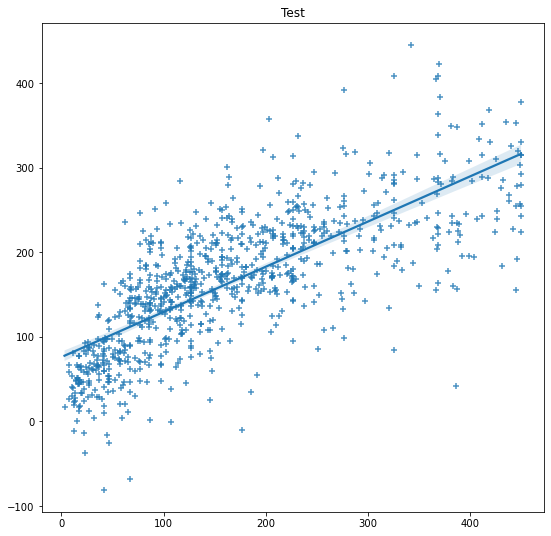

In [285]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(x=y_test, y=y_pred, marker="+").set(title="Test")


In [286]:
# Recommend Price
dict_client = {}

#dict_client["id"] = 219030
#dict_client["host_id"] = 490291
dict_client["host_is_superhost"] = "t"
dict_client["host_listings_count"] = 3
dict_client["host_identity_verified"] = "t"
dict_client["latitude"] = -33.8796
dict_client["longitude"] = 151.217
dict_client["property_type"] = "Entire residential home"
dict_client["room_type"] = "Entire home/apt"
dict_client["accommodates"] = 4
dict_client["bedrooms"] = 2
dict_client["beds"] = 3
dict_client["minimum_nights"] = 1
dict_client["maximum_nights"] = 30
dict_client["has_availability"] = "t"
dict_client["number_of_reviews"] = 61 
dict_client["review_scores_rating"] = 4.95
dict_client["instant_bookable"] = "f"


In [287]:
def transform_client_array(client_array):  
    '''
    INPUT
    client_array - X array
    
    OUTPUT
    arrays with numerical values
    '''
    labelencoder_X = LabelEncoder()
    
    client_array[:,0] = labelencoder_X.fit_transform(client_array[:,0])
    client_array[:,2] = labelencoder_X.fit_transform(client_array[:,2])
    client_array[:,5] = labelencoder_X.fit_transform(client_array[:,5])
    client_array[:,6] = labelencoder_X.fit_transform(client_array[:,6])
    client_array[:,12] = labelencoder_X.fit_transform(client_array[:,12])
    client_array[:,15] = labelencoder_X.fit_transform(client_array[:,15])
    
    return client_array


In [288]:
def recommend_price(client_details):
    '''
    INPUT
    client_details - X array
    
    OUTPUT
    price prediction
    '''
    df_client = pd.DataFrame.from_dict(client_details, orient='index').T
    
    client_array = df_client.iloc[:,].values
    client_X = transform_client_array(client_array)
    
    rec_price = regressor.predict(client_X)
    
    return rec_price

In [289]:
recommended_price = recommend_price(dict_client)
print(recommended_price[0])


163.88846171340992
